Below is a function called `make_image`, that does the following:

* Creates an all black image with the given number of rows and columns
* Given a list of points, fills in pixels in the horizontal, vertical and diagonal lines that intersect that point according to the colour of that point, to within a given range of the point

This algorithm is quite slow, and would benefit from being sped up.

0.016715288162231445


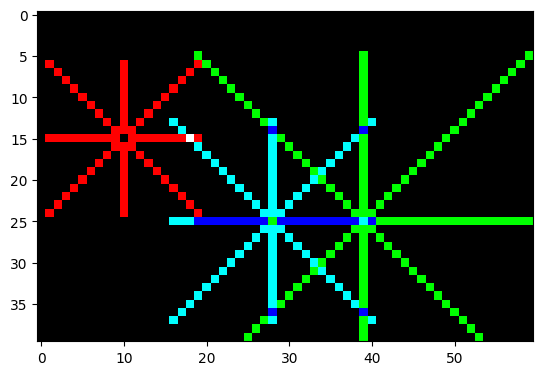

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Point:
    def __init__(self, i, j, range, r, g, b):
        self.i = i
        self.j = j
        self.range = range
        self.rgb = [r, g, b]

def set_point(image, x, y, rgb):
    image[y, x, 0] = 0 if rgb[0] == image[y, x, 0] else 255
    image[y, x, 1] = 0 if rgb[1] == image[y, x, 1] else 255
    image[y, x, 2] = 0 if rgb[2] == image[y, x, 2] else 255

def make_image(rows, cols, points):
    image = np.zeros((rows, cols, 3), dtype=int)

    for j, i in np.ndindex(image.shape[:-1]):
        for p in points:
            d_i = abs(i - p.i)
            d_j = abs(j - p.j)
            if d_i > p.range or d_j > p.range:
                continue
            if d_i == 0 or d_j == 0:
                set_point(image, i, j, p.rgb)
            if d_i == d_j:
                set_point(image, i, j, p.rgb)
    return image

points = [
    Point(10, 15, 9, 255, 0, 0),
    Point(39, 25, 20, 0, 255, 0),
    Point(28, 25, 12, 0, 255, 255),
]
import time
s_time=time.time()
image = make_image(40, 60, points)
e_time=time.time()
plt.imshow(image)
print(e_time-s_time)

## Task 1: Write a modified version of this algorithm with improved performance

At the moment, `make_image` checks every single pixel of the image to determine if any of the points affect that pixel. This is very inefficient. Instead, consider an approach that considers which pixels are affected for each point. Implement your approach in the `make_image_task_1` function in the following cell.

In [ ]:
def make_image_task_1(rows, cols, points):
    """
    YOUR DESCRIPTION HERE
    """
    image = np.zeros((rows, cols, 3), dtype=int)

    #TODO YOUR IMPLEMENTATION HERE

    return image

points = [
    Point(10, 15, 8, 255, 0, 0),
    Point(39, 25, 20, 0, 255, 0),
    Point(28, 25, 12, 0, 255, 255),
]
image = make_image_task_1(40, 60, points)
plt.imshow(image)


0.0010416507720947266


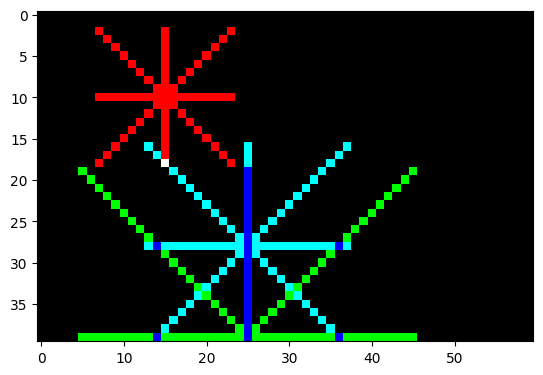

In [ ]:
import time





def make_image_task_1(rows, cols, points):
    image = np.zeros((rows, cols, 3), dtype=int)

    for p in points:
        # Determine the range of affected pixels for the current point
        min_i = max(0, p.i - p.range)
        max_i = min(rows - 1, p.i + p.range)
        min_j = max(0, p.j - p.range)
        max_j = min(cols - 1, p.j + p.range)

        # Iterate over the affected region and set pixels accordingly
        for i in range(min_i, max_i + 1):
            for j in range(min_j, max_j + 1):
                d_i = abs(i - p.i)
                d_j = abs(j - p.j)
                if d_i == 0 or d_j == 0 or d_i == d_j:
                    set_point(image, j, i, p.rgb)

    return image
points = [
    Point(10, 15, 8, 255, 0, 0),
    Point(39, 25, 20, 0, 255, 0),
    Point(28, 25, 12, 0, 255, 255),
]
s_time=time.time()
image = make_image_task_1(40, 60, points)
e_time=time.time()
plt.imshow(image)
print(e_time-s_time)

## Task 2: Further improve the performance

Although we have improved the function algorithmically, the solution is still quite slow because of the python runtime. Apply techniques to further improve its performance. You might consider using:
* Numba
* Cython
* Threading / multiprocessing

Evaluate which approach is most likely to give you reasonable performance and implement it below in a function names `make_image_task_2`. Please feel free to:
* write any additional functions required to make this work,
* change the method signature of `make_image_task_2` including its parameters.

Note that, for this task, you can use the abovementioned approaches to accelerate the `make_image` functon in case you did not successfully implement `make_image_task_1` of task 1.

In [ ]:
#TODO Implement the code related to task 2 here.


In [ ]:
!python -m unittest test_string_utils

..F
FAIL: test_uppercase (test_string_utils.TestStringUtils)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_string_utils.py", line 10, in test_uppercase
    self.assertEqual(uppercase(''), ' ')
AssertionError: '' != ' '
+  

----------------------------------------------------------------------
Ran 3 tests in 0.001s

FAILED (failures=1)
